In [1]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
titanic_df = pd.read_csv("data/titanic.csv", sep=",")

# Exploración de datos

In [4]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [11]:
titanic_df['Survived'].value_counts()

Survived
0    545
1    342
Name: count, dtype: int64

In [12]:
# Eliminamos columnas que no nos interesan
columns_to_drop =["Name", "Fare"]
titanic_df.drop(columns_to_drop, axis="columns", inplace=True)

In [13]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard'],
      dtype='object')

In [14]:
# Por conveniencia modificamos nombres de columnas para simplificar
titanic_df.columns = ["Survived", "Pclass", "Sex", "Age", "SibSip", "Parch"]
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSip,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [15]:
titanic_df.shape

(887, 6)

In [17]:
titanic_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSip        int64
Parch         int64
dtype: object

In [18]:
# Cambiamos tipo de dato object a number
titanic_df = pd.get_dummies(titanic_df, columns=["Sex"], drop_first= True)

In [20]:
print(titanic_df.dtypes)
print(titanic_df.head())

Survived      int64
Pclass        int64
Age         float64
SibSip        int64
Parch         int64
Sex_male       bool
dtype: object
   Survived  Pclass   Age  SibSip  Parch  Sex_male
0         0       3  22.0       1      0      True
1         1       1  38.0       1      0     False
2         1       3  26.0       0      0     False
3         1       1  35.0       1      0     False
4         0       3  35.0       0      0      True


In [21]:
#Reemplazar nombre de columna que cambio su nombre con el data_dummy
titanic_df.rename(columns={"Sex_male": "Sex"}, inplace=True)

In [22]:
# Ordenamiento de las columnas por nombre
titanic_df = titanic_df[["Survived", "Pclass", "Sex", "Age", "SibSip", "Parch"]]
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSip,Parch
0,0,3,True,22.0,1,0
1,1,1,False,38.0,1,0
2,1,3,False,26.0,0,0
3,1,1,False,35.0,1,0
4,0,3,True,35.0,0,0


# Entrenamiento del arbol de decisión con scikit-learn

In [23]:
# Separamos target de las otras variables
X = titanic_df.drop("Survived", axis = 1)
y = titanic_df["Survived"]

In [24]:
# Libreria importar train_test_spit
from sklearn.model_selection import train_test_split

# Dividir los datos de entrenamiento y test (70% 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=00000)

In [26]:
# Crear modelo de decisión
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2, random_state=00000)

In [ ]:
# Entrenamiento

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

# Evaluación del modelo

In [28]:
# Calculo de las predicciones
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [30]:
# Metricas
from sklearn.metrics import accuracy_score

# Calculo del accuracy Train
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculo del accuracy de Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print("El accuracy en train es: ", train_accuracy)
print("El accuracy en test es: ", test_accuracy)


El accuracy en train es:  0.8048387096774193
El accuracy en test es:  0.7640449438202247


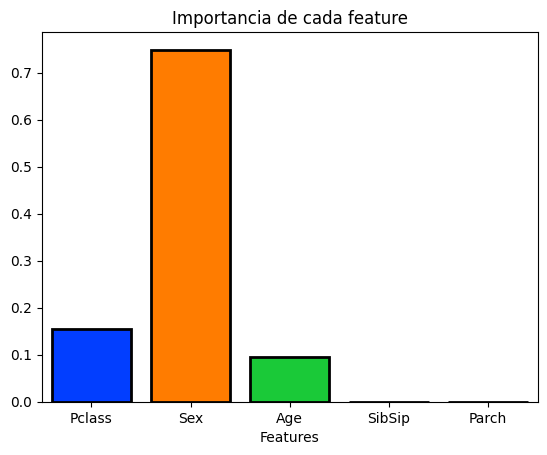

In [37]:
# Feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances, hue=columns, palette="bright", saturation=2.0, edgecolor="black", linewidth=2)
plt.title("Importancia de cada feature")
plt.xlabel("Features")
plt.show()